### Import some system libs

In [2]:
import os
import sys
import plotly.subplots as sp
import plotly.express as px
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import swifter

c:\Users\ASTU-PG\sentiment-analysis-stock-week1\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Load the dataset using the local .env 

In [3]:
sys.path.append('../scripts/')

from dotenv import load_dotenv
from load_data import load_csv
load_dotenv()
finance_data = os.getenv('FINANCIAL_NEWS')
apple_data = os.getenv('APPLE_STOCK')
amazon_data = os.getenv('AMAZON_STOCK')
google_data = os.getenv('GOOGLE_STOCK')
meta_data = os.getenv('META_STOCK')
microsoft_data = os.getenv('MICROSOFT_STOCK')
nvdia_data = os.getenv('NVIDIA_STOCK')
tesla_data = os.getenv('TESLA_STOCK')

finance_df = load_csv(finance_data)
apple_data_df = load_csv(apple_data)
amazon_data_df = load_csv(amazon_data)
google_data_df = load_csv(google_data)
meta_data_df = load_csv(meta_data)
microsoft_data_df = load_csv(microsoft_data)
nvdia_data_df = load_csv(nvdia_data)
tesla_data_df = load_csv(tesla_data)
if finance_df is not None and apple_data_df is not None and amazon_data_df is not None and google_data_df is not None and meta_data_df is not None and microsoft_data_df is not None and nvdia_data_df is not None and tesla_data_df is not None:
    print(f"Data loaded successfully with {len(finance_df)} records.")
    print(f"Data loaded successfully with {len(apple_data_df)} Apple records.")
    print(f"Data loaded successfully with {len(amazon_data_df)} Amazon records.")
    print(f"Data loaded successfully with {len(google_data_df)} Google records.")
    print(f"Data loaded successfully with {len(meta_data_df)} Meta records.")
    print(f"Data loaded successfully with {len(microsoft_data_df)} Microsoft records.")
    print(f"Data loaded successfully with {len(nvdia_data_df)} NVDIA records.")
    print(f"Data loaded successfully with {len(tesla_data_df)} TESLA records.")

Data loaded successfully with 1407328 records.
Data loaded successfully with 10998 Apple records.
Data loaded successfully with 6846 Amazon records.
Data loaded successfully with 5020 Google records.
Data loaded successfully with 2926 Meta records.
Data loaded successfully with 9672 Microsoft records.
Data loaded successfully with 6421 NVDIA records.
Data loaded successfully with 3545 TESLA records.


In [4]:
print('Financial News Data:')
print(finance_df.head())
print(finance_df.columns)
print(finance_df.info())

Financial News Data:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-

### Descriptive Statistics on Data

In [5]:
headline_lengths = finance_df['headline'].apply(len)

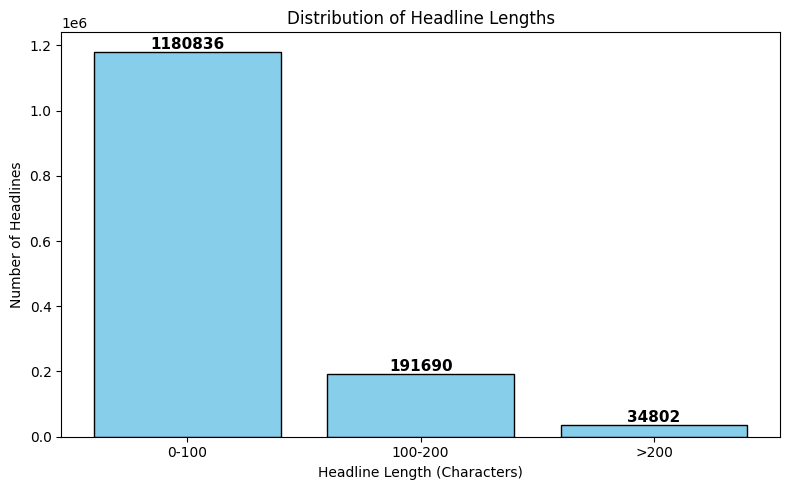

In [6]:
# Define bins and labels
bins = [0, 100, 200, float('inf')]
labels = ['0-100', '100-200', '>200']
headline_bins = pd.cut(headline_lengths, bins=bins, labels=labels, right=False)

# Count headlines per bin
bin_counts = headline_bins.value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(bin_counts.index, bin_counts.values, color='skyblue', edgecolor='black')

# Add counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length (Characters)')
plt.ylabel('Number of Headlines')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Most of the length of headlines fall between 0 - 100 which is **1,180,836**, and the second is 100 - 200 is **191690** and only few more than 200 is **34802**

In [7]:
headline_lengths.describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline, dtype: float64

In [8]:
## show minimum headline length
finance_df['headline_length'] = finance_df['headline'].apply(len)


In [9]:
finance_df['headline_length']

0          39
1          42
2          29
3          44
4          87
           ..
1407323    38
1407324    52
1407325    56
1407326    54
1407327    81
Name: headline_length, Length: 1407328, dtype: int64

<Axes: >

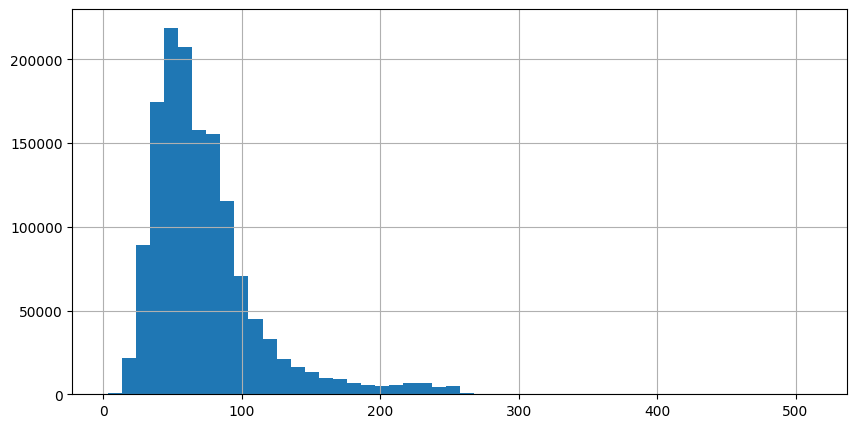

In [10]:
finance_df['headline_length'].hist(bins=50, figsize=(10, 5))

In [11]:
np.round(finance_df['headline_length'].describe(), 2)

count    1407328.00
mean          73.12
std           40.74
min            3.00
25%           47.00
50%           64.00
75%           87.00
max          512.00
Name: headline_length, dtype: float64

In [12]:
fig = px.histogram(finance_df, x='headline_length', nbins=30, title='Distribution of Headline Lengths')
fig.show()

##### Let us count the number of articles published per date in which date the articles where published most

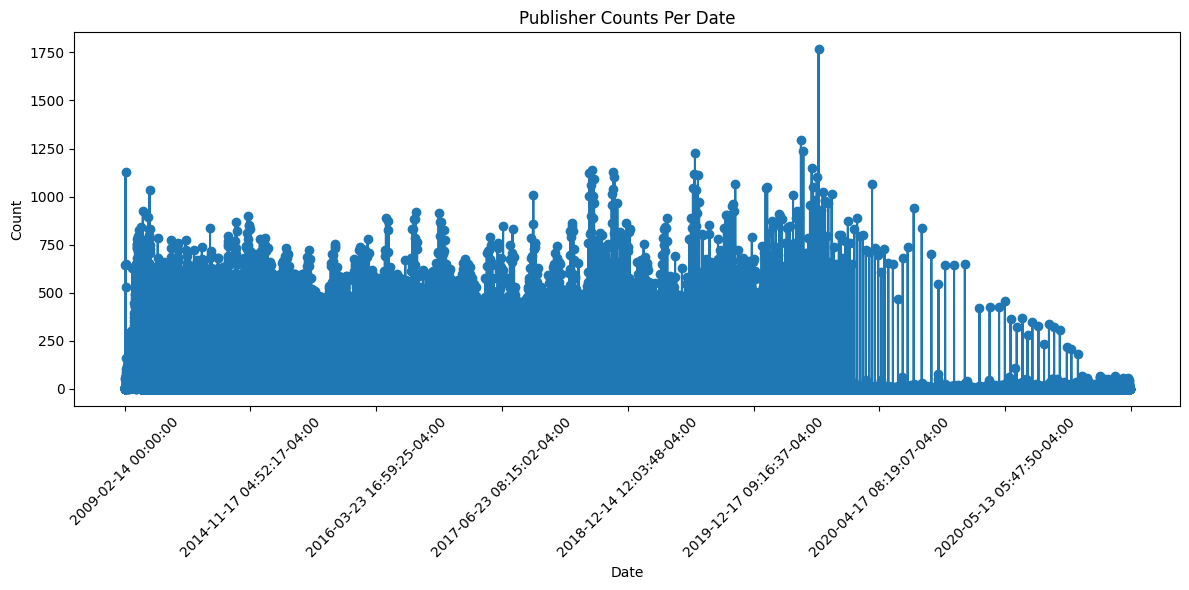

In [13]:
publisher_counts_per_date = finance_df['date'].value_counts()

publisher_counts_per_date = publisher_counts_per_date.sort_index()
plt.figure(figsize=(12, 6))
publisher_counts_per_date.plot(kind='line', marker='o')
plt.title("Publisher Counts Per Date")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Let us count the number of articles per publisher which is to identify which publishers are most active

In [14]:
#The number of articles per publisher
publisher_count = finance_df['publisher'].value_counts()

fig = px.bar(publisher_count, x=publisher_count.index, y=publisher_count.values, height=2000,
               labels={'x': 'Publisher', 'y': 'Number of Articles'},
               title='Number of Articles per Publisher')
fig.update_layout(xaxis={"categoryorder": "total descending"})
fig.show()

In [15]:
### publication dates to see trends over time
finance_df['date'] = pd.to_datetime(finance_df['date'], format='ISO8601', utc=True)
finance_df['date_x'] = finance_df['date'].dt.date
finance_df['date_x'].value_counts().sort_index()

date_x
2009-02-14      1
2009-04-27      2
2009-04-29      1
2009-05-22      1
2009-05-27      6
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    803
2020-06-10    807
2020-06-11    544
Name: count, Length: 3955, dtype: int64

In [16]:
finance_df['date_x'].head()

0    2020-06-05
1    2020-06-03
2    2020-05-26
3    2020-05-22
4    2020-05-22
Name: date_x, dtype: object

In [17]:
print(finance_df['date'].head())
print(finance_df['date'].dtype)

0   2020-06-05 14:30:54+00:00
1   2020-06-03 14:45:20+00:00
2   2020-05-26 08:30:07+00:00
3   2020-05-22 16:45:06+00:00
4   2020-05-22 15:38:59+00:00
Name: date, dtype: datetime64[ns, UTC]
datetime64[ns, UTC]


In [18]:
finance_df.describe

<bound method NDFrame.describe of          Unnamed: 0                                           headline  \
0                 0            Stocks That Hit 52-Week Highs On Friday   
1                 1         Stocks That Hit 52-Week Highs On Wednesday   
2                 2                      71 Biggest Movers From Friday   
3                 3       46 Stocks Moving In Friday's Mid-Day Session   
4                 4  B of A Securities Maintains Neutral on Agilent...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher

In [19]:
finance_df['headline']

0                    Stocks That Hit 52-Week Highs On Friday
1                 Stocks That Hit 52-Week Highs On Wednesday
2                              71 Biggest Movers From Friday
3               46 Stocks Moving In Friday's Mid-Day Session
4          B of A Securities Maintains Neutral on Agilent...
                                 ...                        
1407323               Top Narrow Based Indexes For August 29
1407324    Recap: Wednesday's Top Percentage Gainers and ...
1407325    UPDATE: Oppenheimer Color on China Zenix Auto ...
1407326    Oppenheimer Initiates China Zenix At Outperfor...
1407327    China Zenix Auto International Opens For Tradi...
Name: headline, Length: 1407328, dtype: object

In [20]:
finance_df[finance_df['stock']=='AAPL']

Unnamed: 0                                           headline  \
6680        7120  Tech Stocks And FAANGS Strong Again To Start D...   
6681        7121      10 Biggest Price Target Changes For Wednesday   
6682        7122  Benzinga Pro's Top 5 Stocks To Watch For Wed.,...   
6683        7123  Deutsche Bank Maintains Buy on Apple, Raises P...   
6684        7124  Apple To Let Users Trade In Their Mac Computer...   
...          ...                                                ...   
7116        7585  UBS Maintains Buy on Apple, Lowers Price Targe...   
7117        7586                  123 Biggest Movers From Yesterday   
7118        7587  Crude Awakening: Energy Sector Takes A 20% Spi...   
7119        7588     Investor Movement Index Summary: February 2020   
7120        7589      101 Stocks Moving In Monday's Mid-Day Session   

                                                    url          publisher  \
6680  https://www.benzinga.com/government/20/06/1622...         JJ Kinahan   
6681  https://www.benzinga.com/analyst-ratings/price...         Lisa Levin   
6682  https://www.benzinga.com/short-sellers/20/06/1...  Benzinga Newsdesk   
6683  https://www.benzinga.com/news/20/06/16219873/d...  Benzinga Newsdesk   
6684  https://www.benzinga.com/news/20/06/16218697/a...      Neer Varshney   
...                                                 ...                ...   
7116  https://www.benzinga.com/news/20/03/15514989/u...         Vick Meyer   
7117  https://www.benzinga.com/news/20/03/15514298/1...         Lisa Levin   
7118  https://www.benzinga.com/news/earnings/20/03/1...         JJ Kinahan   
7119  https://www.benzinga.com/news/earnings/20/03/1...      TD Ameritrade   
7120  https://www.benzinga.com/news/20/03/15508983/1...         Lisa Levin   

                          date stock  headline_length      date_x  
6680 2020-06-10 15:33:26+00:00  AAPL               69  2020-06-10  
6681 2020-06-10 12:14:08+00:00  AAPL               45  2020-06-10  
6682 2020-06-10 11:53:47+00:00  AAPL               87  2020-06-10  
6683 2020-06-10 11:19:25+00:00  AAPL               65  2020-06-10  
6684 2020-06-10 10:27:11+00:00  AAPL               87  2020-06-10  
...                        ...   ...              ...         ...  
7116 2020-03-10 04:00:00+00:00  AAPL               55  2020-03-10  
7117 2020-03-10 04:00:00+00:00  AAPL               33  2020-03-10  
7118 2020-03-09 04:00:00+00:00  AAPL               91  2020-03-09  
7119 2020-03-09 04:00:00+00:00  AAPL               46  2020-03-09  
7120 2020-03-09 04:00:00+00:00  AAPL               45  2020-03-09  

[441 rows x 8 columns]

#### Text Analysis (Sentiment analysis and Topic modeling)

In [21]:
from sentimental_analysis import get_sentiment_word

In [22]:
print("Apple Stock data")
print(apple_data_df.head())
print("Amazon Stock data")
print(amazon_data_df.head())
print("Google Stock data")
print(google_data_df.head())
print("Meta Stock data")
print(meta_data_df.head())
print("Microsoft Stock data")
print(microsoft_data_df.head())
print("Nvdia Stock data")
print(nvdia_data_df.head())
print("Tesla Stock data")
print(tesla_data_df.head())

Apple Stock data
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
Amazon Stock data
         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000

## Cleaning the text

In [23]:
import re
finance_df['headline'] = finance_df.apply(lambda row: row['headline'].lower(),axis=1) #removed capitalisation
finance_df['headline'] = finance_df.apply(lambda row: re.sub("@[A-Za-z0-9_]+","", row['headline']),axis=1) #removed mentions
finance_df['headline'] = finance_df.apply(lambda row: re.sub("#[A-Za-z0-9_]+","", row['headline']),axis=1) #removed hashtags
finance_df['headline'] = finance_df.apply(lambda row: re.sub(r"http\S+","", row['headline']),axis=1) #removed websites
finance_df['headline'] = finance_df.apply(lambda row: re.sub(r"www.\S+","", row['headline']),axis=1)
finance_df['headline'] = finance_df.apply(lambda row: re.sub('[()!?]'," ", row['headline']),axis=1) #removed puncs
finance_df['headline'] = finance_df.apply(lambda row: re.sub('\[.*?\]'," ", row['headline']),axis=1) 
finance_df['headline'] = finance_df.apply(lambda row: re.sub("[^a-z]"," ", row['headline']),axis=1)

finance_df[['headline']].head()

<>:8: SyntaxWarning:

invalid escape sequence '\['

<>:8: SyntaxWarning:

invalid escape sequence '\['

C:\Users\ASTU-PG\AppData\Local\Temp\ipykernel_19700\581406656.py:8: SyntaxWarning:

invalid escape sequence '\['



headline
0            stocks that hit    week highs on friday
1         stocks that hit    week highs on wednesday
2                         biggest movers from friday
3          stocks moving in friday s mid day session
4  b of a securities maintains neutral on agilent...

#### Filter data frame for only the main stock names apple, microsoft, google, amazon, TESLA, Meta, NVDIA

In [24]:
target_stocks = ['AAPL', 'MSF', 'GOOG', 'AMZN', 'TSLA', 'FB', 'NVDA']

In [25]:
filtered_df = finance_df[finance_df['stock'].isin(target_stocks)].copy()

In [26]:

filtered_df['Sentiment'] = filtered_df['headline'].apply(lambda x : get_sentiment_word(x))
filtered_df.head()

Unnamed: 0                                           headline  \
6680        7120  tech stocks and faangs strong again to start d...   
6681        7121         biggest price target changes for wednesday   
6682        7122  benzinga pro s top   stocks to watch for wed  ...   
6683        7123  deutsche bank maintains buy on apple  raises p...   
6684        7124  apple to let users trade in their mac computer...   

                                                    url          publisher  \
6680  https://www.benzinga.com/government/20/06/1622...         JJ Kinahan   
6681  https://www.benzinga.com/analyst-ratings/price...         Lisa Levin   
6682  https://www.benzinga.com/short-sellers/20/06/1...  Benzinga Newsdesk   
6683  https://www.benzinga.com/news/20/06/16219873/d...  Benzinga Newsdesk   
6684  https://www.benzinga.com/news/20/06/16218697/a...      Neer Varshney   

                          date stock  headline_length      date_x  Sentiment  
6680 2020-06-10 15:33:26+00:00  AAPL               69  2020-06-10     0.5574  
6681 2020-06-10 12:14:08+00:00  AAPL               45  2020-06-10     0.0000  
6682 2020-06-10 11:53:47+00:00  AAPL               87  2020-06-10     0.2023  
6683 2020-06-10 11:19:25+00:00  AAPL               65  2020-06-10     0.0000  
6684 2020-06-10 10:27:11+00:00  AAPL               87  2020-06-10     0.3818

In [27]:
filtered_df[filtered_df["stock"]=="AAPL"]

Unnamed: 0                                           headline  \
6680        7120  tech stocks and faangs strong again to start d...   
6681        7121         biggest price target changes for wednesday   
6682        7122  benzinga pro s top   stocks to watch for wed  ...   
6683        7123  deutsche bank maintains buy on apple  raises p...   
6684        7124  apple to let users trade in their mac computer...   
...          ...                                                ...   
7116        7585  ubs maintains buy on apple  lowers price targe...   
7117        7586                      biggest movers from yesterday   
7118        7587  crude awakening  energy sector takes a     spi...   
7119        7588     investor movement index summary  february        
7120        7589          stocks moving in monday s mid day session   

                                                    url          publisher  \
6680  https://www.benzinga.com/government/20/06/1622...         JJ Kinahan   
6681  https://www.benzinga.com/analyst-ratings/price...         Lisa Levin   
6682  https://www.benzinga.com/short-sellers/20/06/1...  Benzinga Newsdesk   
6683  https://www.benzinga.com/news/20/06/16219873/d...  Benzinga Newsdesk   
6684  https://www.benzinga.com/news/20/06/16218697/a...      Neer Varshney   
...                                                 ...                ...   
7116  https://www.benzinga.com/news/20/03/15514989/u...         Vick Meyer   
7117  https://www.benzinga.com/news/20/03/15514298/1...         Lisa Levin   
7118  https://www.benzinga.com/news/earnings/20/03/1...         JJ Kinahan   
7119  https://www.benzinga.com/news/earnings/20/03/1...      TD Ameritrade   
7120  https://www.benzinga.com/news/20/03/15508983/1...         Lisa Levin   

                          date stock  headline_length      date_x  Sentiment  
6680 2020-06-10 15:33:26+00:00  AAPL               69  2020-06-10     0.5574  
6681 2020-06-10 12:14:08+00:00  AAPL               45  2020-06-10     0.0000  
6682 2020-06-10 11:53:47+00:00  AAPL               87  2020-06-10     0.2023  
6683 2020-06-10 11:19:25+00:00  AAPL               65  2020-06-10     0.0000  
6684 2020-06-10 10:27:11+00:00  AAPL               87  2020-06-10     0.3818  
...                        ...   ...              ...         ...        ...  
7116 2020-03-10 04:00:00+00:00  AAPL               55  2020-03-10    -0.1280  
7117 2020-03-10 04:00:00+00:00  AAPL               33  2020-03-10     0.0000  
7118 2020-03-09 04:00:00+00:00  AAPL               91  2020-03-09    -0.9062  
7119 2020-03-09 04:00:00+00:00  AAPL               46  2020-03-09     0.0000  
7120 2020-03-09 04:00:00+00:00  AAPL               45  2020-03-09     0.0000  

[441 rows x 9 columns]

Now we need to create posetive, negative, neutral for polarity of sentiment

In [28]:
filtered_df['sentiment_score_word'] = filtered_df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [29]:
filtered_df.head()

Unnamed: 0                                           headline  \
6680        7120  tech stocks and faangs strong again to start d...   
6681        7121         biggest price target changes for wednesday   
6682        7122  benzinga pro s top   stocks to watch for wed  ...   
6683        7123  deutsche bank maintains buy on apple  raises p...   
6684        7124  apple to let users trade in their mac computer...   

                                                    url          publisher  \
6680  https://www.benzinga.com/government/20/06/1622...         JJ Kinahan   
6681  https://www.benzinga.com/analyst-ratings/price...         Lisa Levin   
6682  https://www.benzinga.com/short-sellers/20/06/1...  Benzinga Newsdesk   
6683  https://www.benzinga.com/news/20/06/16219873/d...  Benzinga Newsdesk   
6684  https://www.benzinga.com/news/20/06/16218697/a...      Neer Varshney   

                          date stock  headline_length      date_x  Sentiment  \
6680 2020-06-10 15:33:26+00:00  AAPL               69  2020-06-10     0.5574   
6681 2020-06-10 12:14:08+00:00  AAPL               45  2020-06-10     0.0000   
6682 2020-06-10 11:53:47+00:00  AAPL               87  2020-06-10     0.2023   
6683 2020-06-10 11:19:25+00:00  AAPL               65  2020-06-10     0.0000   
6684 2020-06-10 10:27:11+00:00  AAPL               87  2020-06-10     0.3818   

     sentiment_score_word  
6680             Positive  
6681              Neutral  
6682             Positive  
6683              Neutral  
6684             Positive

In [30]:
negative_count = (filtered_df['sentiment_score_word']=='Negative').sum()
positive_count = (filtered_df['sentiment_score_word']=='Positive').sum()
neutral_count = (filtered_df['sentiment_score_word']=='Neutral').sum()
print(f"Negative: {negative_count}, Positive: {positive_count}, Neutral: {neutral_count}")

Negative: 1233, Positive: 2648, Neutral: 3450


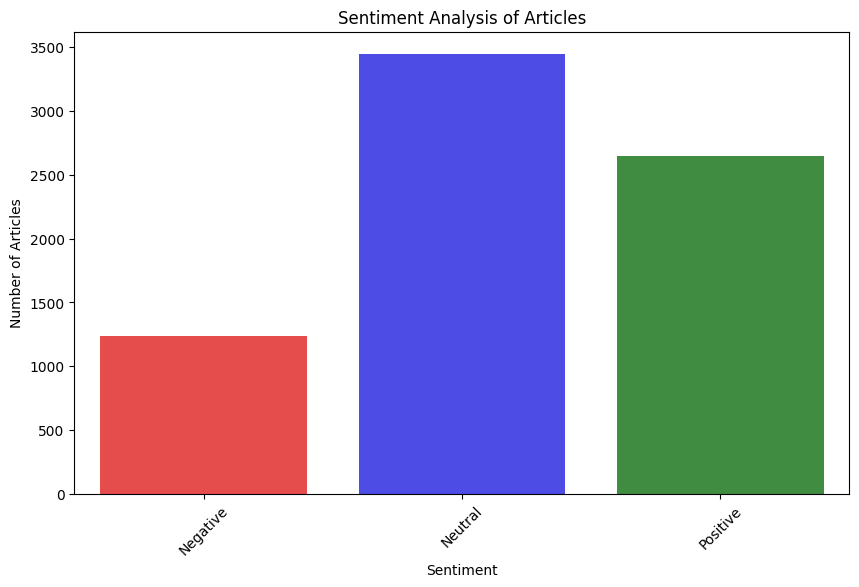

In [31]:
from sentimental_analysis import articles_sentiment_analysis
articles_sentiment_analysis(filtered_df)

Positive Count: 2648
Negative Count: 1233
Neutral Count: 3450


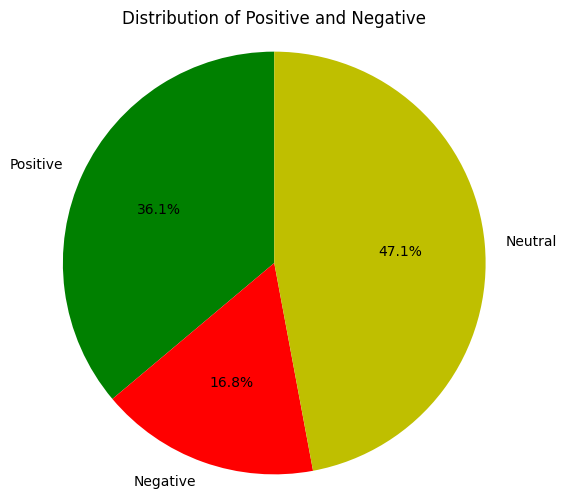

In [32]:
positive_count = (filtered_df['Sentiment'] > 0).sum()  # count positive values
negative_count = (filtered_df['Sentiment'] < 0).sum()  # count negative values
zero_count = (filtered_df['Sentiment'] == 0).sum()  # count zero values

# display counts
print("Positive Count:", positive_count)
print("Negative Count:", negative_count)
print("Neutral Count:", zero_count)

labels = ['Positive', 'Negative' , 'Neutral']
sizes = [positive_count, negative_count, zero_count]
colors = ['g', 'r', 'y' ]  

# pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Positive and Negative')
plt.show()

<Axes: xlabel='date'>

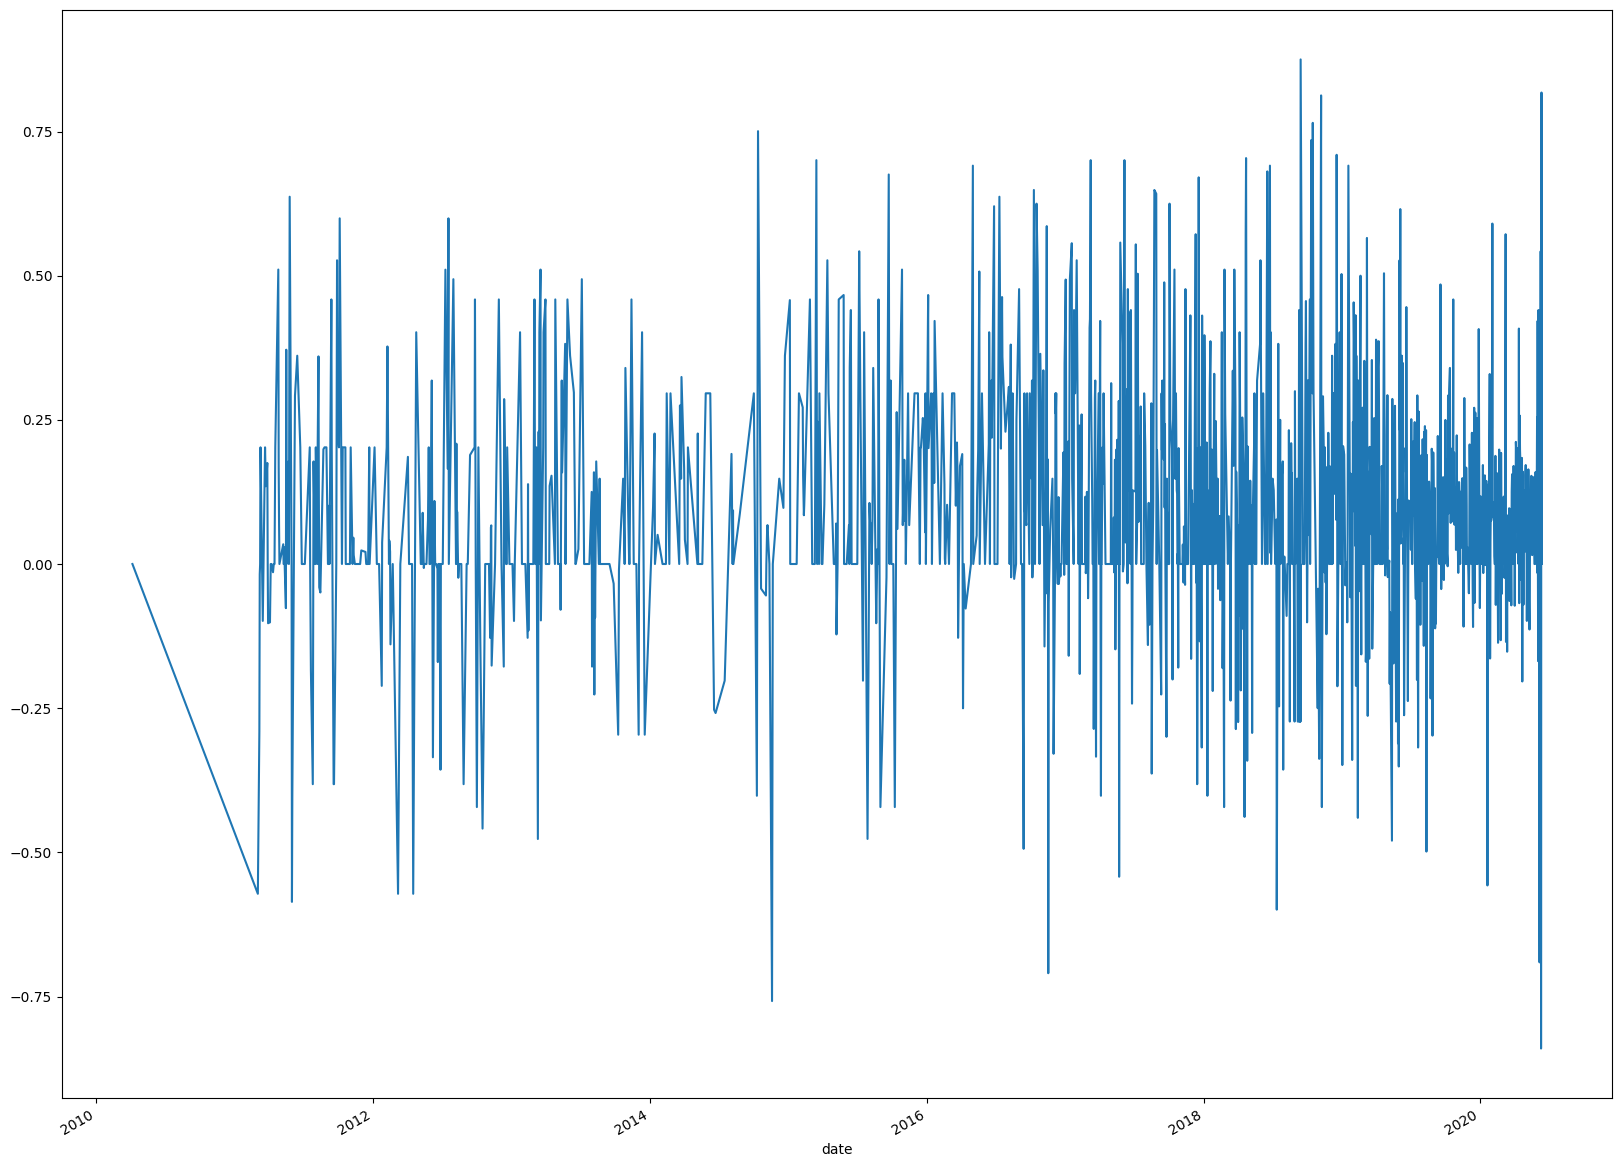

In [33]:
filtered_df.groupby('date')['Sentiment'].mean().plot(figsize=(20,16))

##### Number of Published articles wrt sentiment categories

In [34]:
sentiment_Categories=filtered_df['sentiment_score_word'].value_counts()
print(sentiment_Categories)

sentiment_score_word
Neutral     3450
Positive    2648
Negative    1233
Name: count, dtype: int64


##### Categorize Sentiment by pecentage

In [35]:
number_Of_Sentiment=filtered_df['sentiment_score_word'].shape

number_Of_Sentiment

(7331,)

In [36]:
number_Of_Sentiment=filtered_df['sentiment_score_word'].shape
percentage_Of_Categories = np.round((sentiment_Categories/number_Of_Sentiment)*100,2)
percentage_Of_Categories.head()

sentiment_score_word
Neutral     47.06
Positive    36.12
Negative    16.82
Name: count, dtype: float64

## Time Series Analysis

In [37]:
# Convert date to datetime for analysis
#filtered_df['date'] = pd.to_datetime(filtered_df['date'], errors='coerce')
filtered_df.head(5)

Unnamed: 0                                           headline  \
6680        7120  tech stocks and faangs strong again to start d...   
6681        7121         biggest price target changes for wednesday   
6682        7122  benzinga pro s top   stocks to watch for wed  ...   
6683        7123  deutsche bank maintains buy on apple  raises p...   
6684        7124  apple to let users trade in their mac computer...   

                                                    url          publisher  \
6680  https://www.benzinga.com/government/20/06/1622...         JJ Kinahan   
6681  https://www.benzinga.com/analyst-ratings/price...         Lisa Levin   
6682  https://www.benzinga.com/short-sellers/20/06/1...  Benzinga Newsdesk   
6683  https://www.benzinga.com/news/20/06/16219873/d...  Benzinga Newsdesk   
6684  https://www.benzinga.com/news/20/06/16218697/a...      Neer Varshney   

                          date stock  headline_length      date_x  Sentiment  \
6680 2020-06-10 15:33:26+00:00  AAPL               69  2020-06-10     0.5574   
6681 2020-06-10 12:14:08+00:00  AAPL               45  2020-06-10     0.0000   
6682 2020-06-10 11:53:47+00:00  AAPL               87  2020-06-10     0.2023   
6683 2020-06-10 11:19:25+00:00  AAPL               65  2020-06-10     0.0000   
6684 2020-06-10 10:27:11+00:00  AAPL               87  2020-06-10     0.3818   

     sentiment_score_word  
6680             Positive  
6681              Neutral  
6682             Positive  
6683              Neutral  
6684             Positive

#### Publication Frequency Over Time

In [38]:
# Group by date and count the number of publications
#filtered_df['date'] = pd.to_datetime(filtered_df['date'], errors='coerce')
filtered_df['publication_date'] = filtered_df['date'].dt.date
daily_counts = filtered_df.groupby('publication_date').size()

##### Plot daily publication frequency

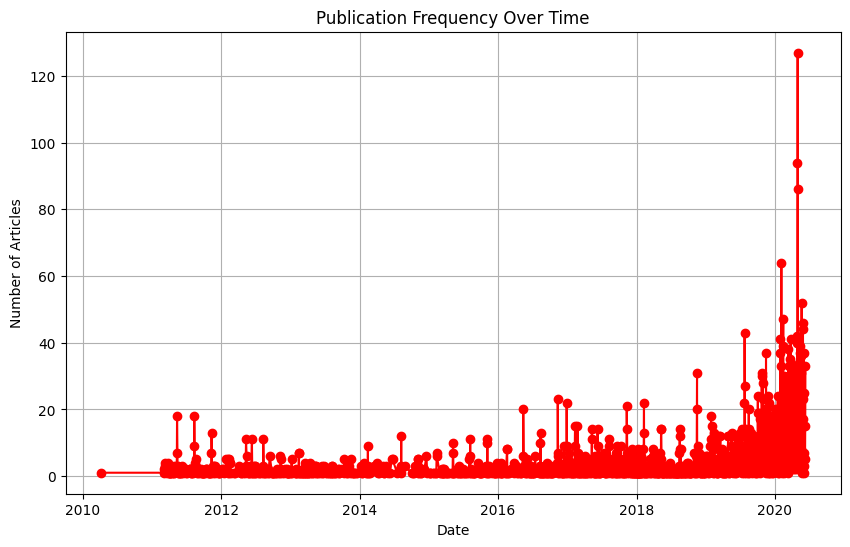

In [39]:

plt.figure(figsize=(10, 6))
daily_counts.plot(kind='line', marker='o', color='red')
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

##### Number of Publication per hour

In [40]:
filtered_df['date'].dt.hour

6680       15
6681       12
6682       11
6683       11
6684       10
           ..
1257091     4
1257092     4
1257093     4
1257094     4
1257095     4
Name: date, Length: 7331, dtype: int32

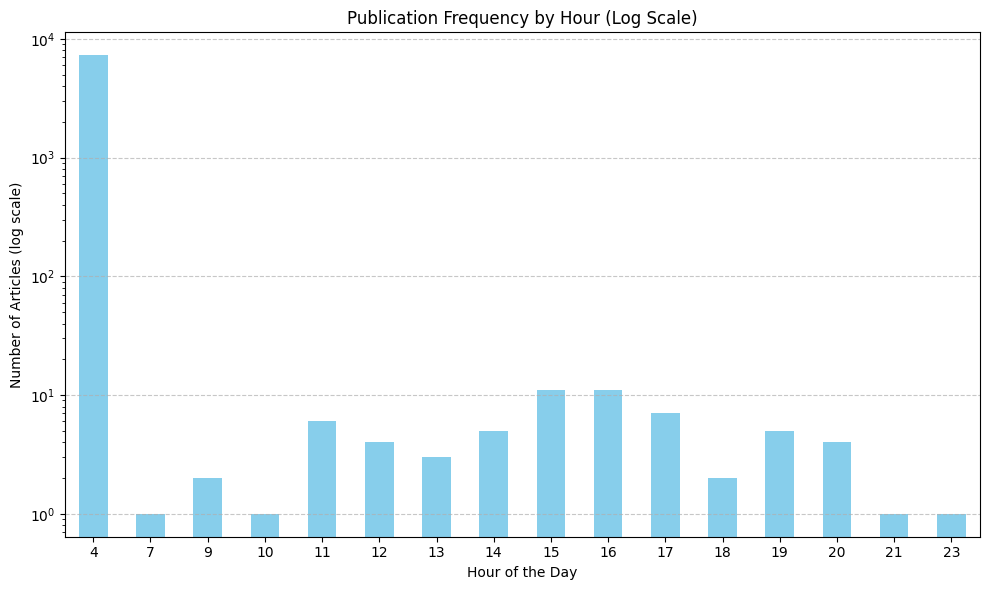

In [42]:
#### Publishing Times Analysis ###
# Extract hour from the `date` column
filtered_df['publication_hour'] = filtered_df['date'].dt.hour

# Count the number of publications by hour
hourly_counts = filtered_df['publication_hour'].value_counts().sort_index()
hourly_counts.index.name = None  # Remove index name to avoid MultiIndex
hourly_counts.name = 'count'     # Optional: set the Series name


# Plot publishing times

plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.yscale('log')  # 👈 Use log scale
plt.title('Publication Frequency by Hour (Log Scale)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles (log scale)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



### Analysis on Publisher

In [43]:
publisher_counts = filtered_df['publisher'].value_counts()
print("Top 10 Publishers by Article Count:")
print(publisher_counts.head(10))
print("\nLast 10 Publishers by Article Count:")
print(publisher_counts.tail(10))

Top 10 Publishers by Article Count:
publisher
Benzinga Newsdesk    1688
Lisa Levin            650
Charles Gross         461
Benzinga_Newsdesk     310
JJ Kinahan            299
Wayne Duggan          299
Paul Quintaro         294
Neer Varshney         279
Jayson Derrick        237
Shanthi Rexaline      193
Name: count, dtype: int64

Last 10 Publishers by Article Count:
publisher
Brett Callwood       1
Patrick Henderson    1
Mark Page            1
Ryan Mallory         1
Osher Deri           1
Drew Levine          1
Tom Meilleur         1
Trevor Turner        1
Nina Zdinjak         1
Maxime Croll         1
Name: count, dtype: int64


### Sentiment analysis for publisher

In [44]:
from sentimental_analysis import get_sentiment_analysis_publisher

sentiment_score_word
Negative    345
Neutral     556
Positive    787
Name: count, dtype: int64


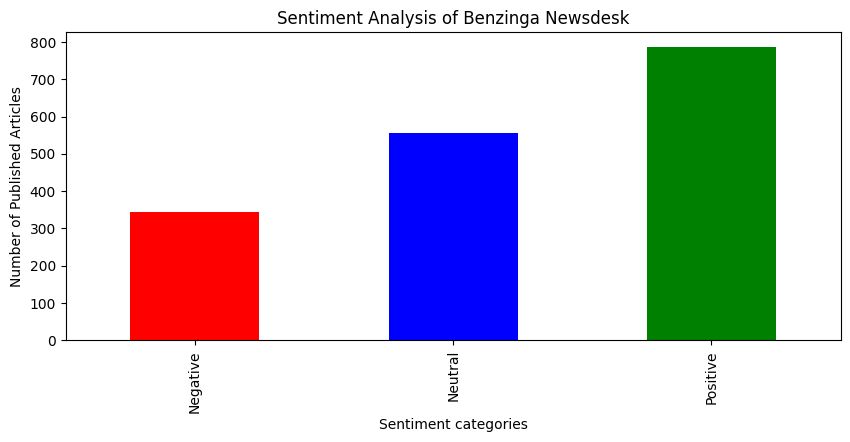

In [45]:
get_sentiment_analysis_publisher(filtered_df,'Benzinga Newsdesk')

In [46]:
### Publishers Contribution ###
# Count articles per publisher
publisher_counts = filtered_df['publisher'].value_counts()

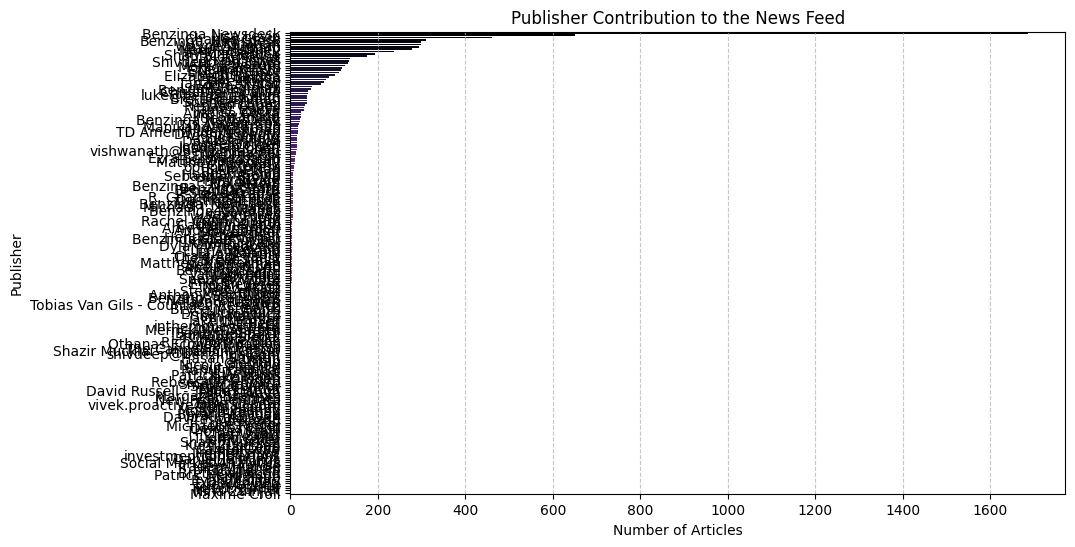

In [47]:
# Plot publisher contribution
plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_counts.values, y=publisher_counts.index, palette="magma")
plt.title("Publisher Contribution to the News Feed")
plt.xlabel("Number of Articles")
plt.ylabel("Publisher")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [48]:
### Extract Unique Domains from Email Addresses ###
# Identify if a publisher name is an email address
filtered_df['is_email'] = filtered_df['publisher'].str.contains('@')

# Extract domain from email addresses
filtered_df['domain'] = filtered_df['publisher'].apply(
    lambda x: x.split('@')[1] if '@' in x else None
)

# Count the number of articles by domain
domain_counts = filtered_df['domain'].value_counts()

In [51]:
filtered_df.to_csv("../data/processed/filtered__news_data.csv", index=False)